<a href="https://colab.research.google.com/github/mdikas/final-project-zenius-data-analyst/blob/main/Improved_Final_Project_Zenius_Data_Analysis_Kelompok_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler ,TomekLinks
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc, plot_confusion_matrix,plot_roc_curve,precision_recall_curve

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MSIB/Dataset/transactions.csv')

## Data Understanding

In [6]:
# preview the dataset

df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [7]:
# view summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [8]:
# Check missing values

df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInM

In [9]:
# view dimensions of dataset

df.shape

(641914, 29)

Explore Categorical Variables

In [10]:
# Find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('{} categorical variables\n'.format(len(categorical)))

9 categorical variables



In [11]:
print('The categorical variables are :', categorical)

The categorical variables are : ['transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType']


In [12]:
# find boolean variables

boolean = [var for var in df.columns if df[var].dtype=='bool']

print('{} boolean variables\n'.format(len(boolean)))

3 boolean variables



In [13]:
print('The boolean variables are :', boolean)

The boolean variables are : ['isFraud', 'cardPresent', 'expirationDateKeyInMatch']


In [14]:
# View the number of labels for each categorical variable

for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

transactionDateTime  contains  635472  labels
merchantName  contains  2493  labels
acqCountry  contains  5  labels
merchantCountryCode  contains  5  labels
merchantCategoryCode  contains  19  labels
currentExpDate  contains  165  labels
accountOpenDate  contains  1826  labels
dateOfLastAddressChange  contains  2186  labels
transactionType  contains  4  labels


Summary of categorical variables

* There are a total of 12 variables.
* There are 5 categorical variables (merchantName, acqCountry, merchantCountryCode, merchantCategoryCode, and transactionType).
* There are 4 date variables (transactionDateTime, currentExpDate, accountOpenDate, and dateOfLastAddressChange).
* There are 3 binary variables (isFraud, cardPresent, and expirationDateKeyInMatch.
* isFraud is the target variable.




Explore Numerical Variables

In [15]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype=='int64' or df[var].dtype=='float64']

print('{} numerical variables\n'.format(len(numerical)))

17 numerical variables



In [16]:
# view the numerical variables

df[numerical].head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
0,733493772,733493772,5000,5000.00,111.33,5.0,1.0,492,492,9184,NaN,0.00,NaN,NaN,NaN,NaN,NaN
1,733493772,733493772,5000,4888.67,24.75,9.0,1.0,492,492,9184,NaN,111.33,NaN,NaN,NaN,NaN,NaN
2,733493772,733493772,5000,4863.92,187.40,5.0,1.0,492,492,9184,NaN,136.08,NaN,NaN,NaN,NaN,NaN
3,733493772,733493772,5000,4676.52,227.34,2.0,1.0,492,492,9184,NaN,323.48,NaN,NaN,NaN,NaN,NaN
4,733493772,733493772,5000,4449.18,0.00,2.0,1.0,492,492,9184,NaN,550.82,NaN,NaN,NaN,NaN,NaN


Summary of numerical variables

* There are 11 numerical variables
* These are given by, accountNumber, customerId, creditLimit, availableMoney, transactionAmount, posEntryMode, posConditionCode, cardCVV, enteredCVV, cardLast4Digits, and currentBalance.

# Exploratory Data Analysis

### Visualization

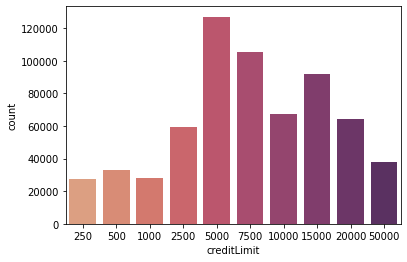

In [17]:
sns.countplot(df['creditLimit'].sort_values().astype(str),palette="flare")

Most of the Credit Cards have 5000 as their limit, on second number it is 7500.

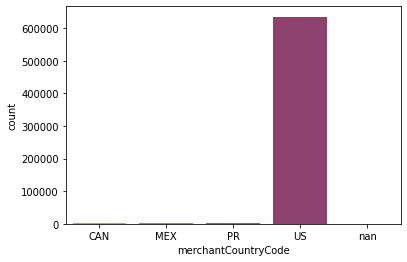

In [18]:
sns.countplot(df['merchantCountryCode'].sort_values().astype(str),palette="flare")

4 Types of Merchant Country Code, where US is a dominant entity as shown.

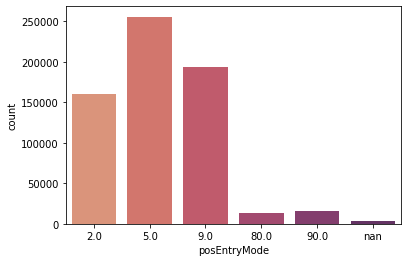

In [19]:
sns.countplot(df['posEntryMode'].sort_values().astype(str),palette="flare")

5 POS Entry Mode where “05”, “09”, and “02” covers most of the values

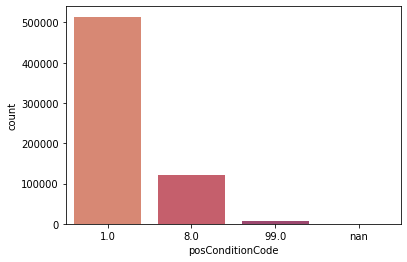

In [20]:
sns.countplot(df['posConditionCode'].sort_values().astype(str),palette="flare")

3 POS Condition Mode exists where “01” is dominant among all


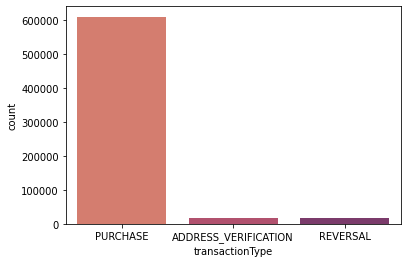

In [21]:
sns.countplot(df['transactionType'],palette="flare")

There are 3 transaction types, where purchase type is the most dominant.

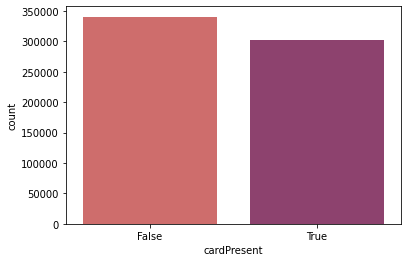

In [22]:
sns.countplot(df['cardPresent'].astype(str),palette="flare")

If card is Present during the transaction.

[Text(0, 0, 'Lyft'),
 Text(0, 0, 'Uber'),
 Text(0, 0, 'gap.com'),
 Text(0, 0, 'apple.com'),
 Text(0, 0, 'target.com'),
 Text(0, 0, 'alibaba.com'),
 Text(0, 0, 'staples.com'),
 Text(0, 0, 'amazon.com'),
 Text(0, 0, 'ebay.com'),
 Text(0, 0, 'discount.com')]

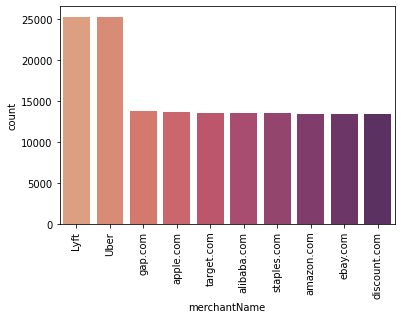

In [23]:
ax = sns.countplot(df['merchantName'], palette="flare", order=df['merchantName'].sort_values().value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Top 10 Merchant by count

[Text(0, 0, 'online_retail'),
 Text(0, 0, 'fastfood'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'food'),
 Text(0, 0, 'rideshare'),
 Text(0, 0, 'online_gifts'),
 Text(0, 0, 'hotels'),
 Text(0, 0, 'fuel'),
 Text(0, 0, 'subscriptions'),
 Text(0, 0, 'personal care')]

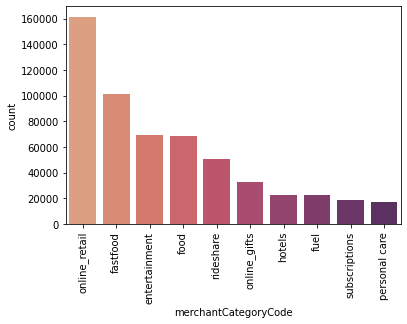

In [24]:
ax = sns.countplot(df['merchantCategoryCode'], palette="flare", order=df['merchantCategoryCode'].sort_values().value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Top 10 Category

Histogram numerical variables

Text(0, 0.5, 'Count')

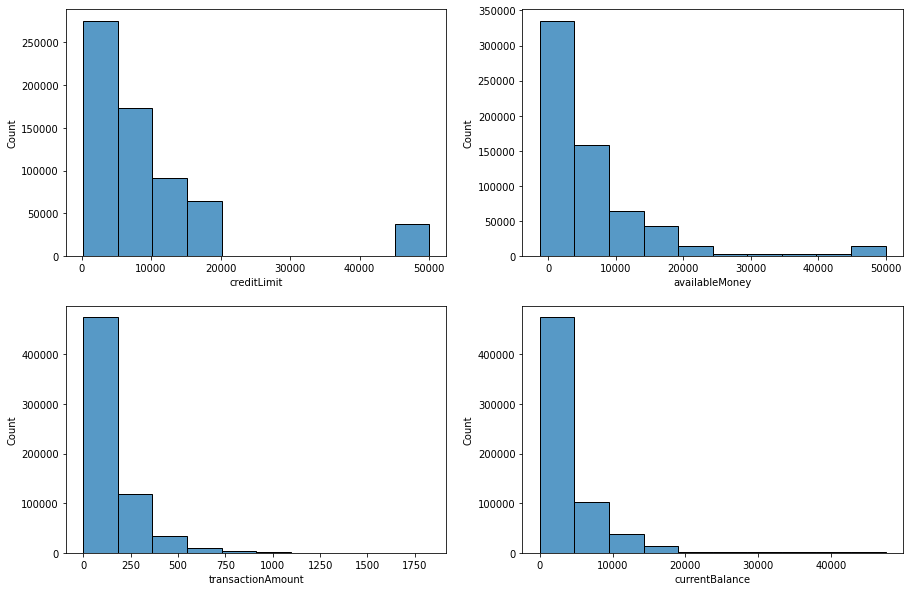

In [25]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = sns.histplot(df['creditLimit'],bins=10)
fig.set_xlabel('creditLimit')
fig.set_ylabel('Count')

plt.subplot(2, 2, 2)
fig = sns.histplot(df['availableMoney'],bins=10)
fig.set_xlabel('availableMoney')
fig.set_ylabel('Count')

plt.subplot(2, 2, 3)
fig = sns.histplot(df['transactionAmount'],bins=10)
fig.set_xlabel('transactionAmount')
fig.set_ylabel('Count')

plt.subplot(2, 2, 4)
fig = sns.histplot(df['currentBalance'],bins=10)
fig.set_xlabel('currentBalance')
fig.set_ylabel('Count')

These Numerical Atrributes are Right Skewed

Boxplot numerical variables

Text(0.5, 1.0, 'currentBalance')

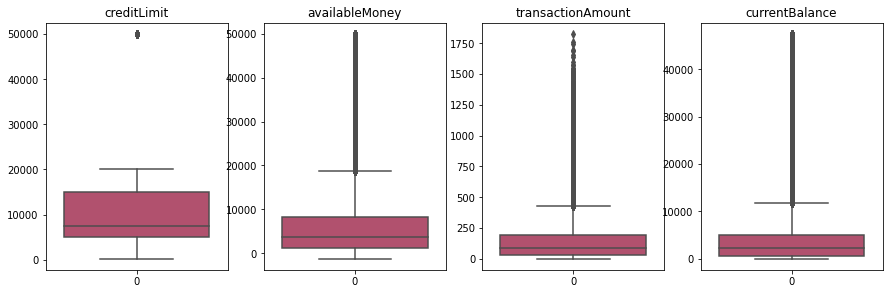

In [26]:
# Box Plots help analyzing the Outliers in the datasets and the skewness

plt.figure(figsize=(15,10))


plt.subplot(2, 4, 1)
fig = sns.boxplot(data=df['creditLimit'],palette="flare")
fig.set_title('creditLimit')

plt.subplot(2, 4, 2)
fig = sns.boxplot(data=df['availableMoney'],palette="flare")
fig.set_title('availableMoney')

plt.subplot(2, 4, 3)
fig = sns.boxplot(data=df['transactionAmount'],palette="flare")
fig.set_title('transactionAmount')

plt.subplot(2, 4, 4)
fig = sns.boxplot(data=df['currentBalance'],palette="flare")
fig.set_title('currentBalance')

Plot Heatmap to see Correlation Matrix between these 4 Numerical Attributes.

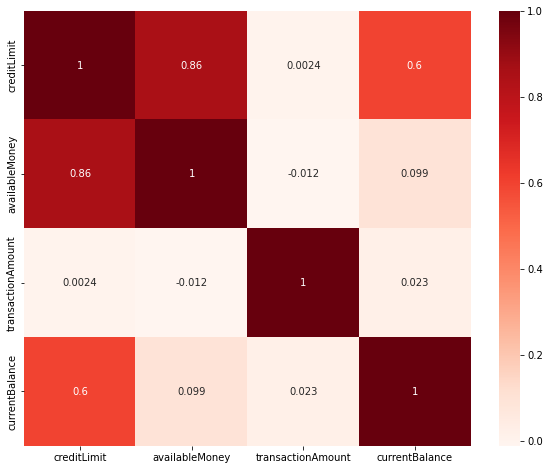

In [27]:
num_c = ['creditLimit','availableMoney','transactionAmount','currentBalance']

plt.figure(figsize=(10,8))
sns.heatmap(df[num_c].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

## Data Wrangling

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [29]:
# Drop empty column, merchantName, and 3 date variables

df = df.drop(columns=['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises',
                      'recurringAuthInd','merchantName','currentExpDate','accountOpenDate','dateOfLastAddressChange'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   acqCountry                638001 non-null  object 
 7   merchantCountryCode       641290 non-null  object 
 8   posEntryMode              638569 non-null  float64
 9   posConditionCode          641627 non-null  float64
 10  merchantCategoryCode      641914 non-null  object 
 11  cardCVV                   641914 non-null  int64  
 12  enteredCVV                641914 non-null  int64  
 13  cardLast4Digits           641914 non-null  i

Matched CVV

In [31]:
# Make new column named 'matchedCVV' with the values are if cardCVV is equal to enteredCVV

df['matchedCVV'] = df['cardCVV'].eq(df['enteredCVV'])

In [32]:
df['matchedCVV'].value_counts()

True     635977
False      5937
Name: matchedCVV, dtype: int64

In [33]:
# Drop cardCVV and enteredCVV

df = df.drop(columns=['cardCVV','enteredCVV'])

Transaction Date Time

In [34]:
# convert 'transactionDateTime' into datetime format

df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['transactionDateTime']

0        2016-01-08 19:04:50
1        2016-01-09 22:32:39
2        2016-01-11 13:36:55
3        2016-01-11 22:47:46
4        2016-01-16 01:41:11
                 ...        
641909   2016-12-04 12:29:21
641910   2016-12-09 04:20:35
641911   2016-12-16 07:58:23
641912   2016-12-19 02:30:35
641913   2016-12-28 11:14:14
Name: transactionDateTime, Length: 641914, dtype: datetime64[ns]

In [35]:
# Extracting duplicate transactions
Duplicated = (df.sort_values(['transactionDateTime']).groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionDateTime'].diff().dt.total_seconds().lt(600))

In [36]:
# make new column 'multiSwipe'

df['multiSwipe'] = Duplicated

In [37]:
# extract transactionDateTime into year,month,week,day,hour,and minute

df['transaction_year'] = df['transactionDateTime'].dt.year
df['transaction_month'] = df['transactionDateTime'].dt.month
df['transaction_week'] = df['transactionDateTime'].dt.weekday
df['transaction_day'] = df['transactionDateTime'].dt.day
df['transaction_hour'] = df['transactionDateTime'].dt.hour
df['transaction_minute'] = df['transactionDateTime'].dt.minute

In [38]:
# drop transactionDateTime

df = df.drop(columns=['transactionDateTime'])

In [39]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,733493772,733493772,5000,5000.00,111.33,US,US,5.0,1.0,rideshare,...,False,False,True,False,2016,1,4,8,19,4
1,733493772,733493772,5000,4888.67,24.75,US,US,9.0,1.0,rideshare,...,False,False,True,False,2016,1,5,9,22,32
2,733493772,733493772,5000,4863.92,187.40,US,US,5.0,1.0,rideshare,...,False,False,True,False,2016,1,0,11,13,36
3,733493772,733493772,5000,4676.52,227.34,US,US,2.0,1.0,rideshare,...,False,False,True,False,2016,1,0,11,22,47
4,733493772,733493772,5000,4449.18,0.00,US,US,2.0,1.0,rideshare,...,False,False,True,False,2016,1,5,16,1,41


In [40]:
# drop accountNumber and customerId

df = df.drop(columns=['accountNumber','customerId'])

In [41]:
# show unique values acqCountry dan merchantCountryCode

df['acqCountry'].unique()

array(['US', nan, 'PR', 'MEX', 'CAN'], dtype=object)

In [42]:
df['merchantCountryCode'].unique()

array(['US', 'PR', 'MEX', nan, 'CAN'], dtype=object)

In [43]:
# Same label column handling (US,MEX,PR,CAN)

cols = []
for column in df.merchantCountryCode:
    if column == 'MEX':
      cols.append(f'MEX_{1}')
      continue
    elif column == 'US':
      cols.append(f'US_{1}')
      continue
    elif column == 'PR':
      cols.append(f'PR_{1}')
      continue 
    elif column == 'CAN':
      cols.append(f'CAN_{1}')
      continue 
    cols.append(column)
df.merchantCountryCode = cols

In [44]:
df['merchantCountryCode'].unique()

array(['US_1', 'PR_1', 'MEX_1', nan, 'CAN_1'], dtype=object)

In [45]:
# Check missing values

df.isnull().sum()

creditLimit                    0
availableMoney                 0
transactionAmount              0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
matchedCVV                     0
multiSwipe                     0
transaction_year               0
transaction_month              0
transaction_week               0
transaction_day                0
transaction_hour               0
transaction_minute             0
dtype: int64

In [46]:
df.shape

(641914, 22)

In [47]:
# drop row with null values
df = df.dropna()
 
# reset index
df = df.reset_index(drop = True)

In [48]:
# Check missing values

df.isnull().sum()

creditLimit                 0
availableMoney              0
transactionAmount           0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
matchedCVV                  0
multiSwipe                  0
transaction_year            0
transaction_month           0
transaction_week            0
transaction_day             0
transaction_hour            0
transaction_minute          0
dtype: int64

In [49]:
df.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardLast4Digits,transactionType,...,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,transaction_year,transaction_month,transaction_week,transaction_day,transaction_hour,transaction_minute
0,5000,5000.00,111.33,US,US_1,5.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,4,8,19,4
1,5000,4888.67,24.75,US,US_1,9.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,5,9,22,32
2,5000,4863.92,187.40,US,US_1,5.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,0,11,13,36
3,5000,4676.52,227.34,US,US_1,2.0,1.0,rideshare,9184,PURCHASE,...,False,False,True,False,2016,1,0,11,22,47
4,5000,4449.18,0.00,US,US_1,2.0,1.0,rideshare,9184,ADDRESS_VERIFICATION,...,False,False,True,False,2016,1,5,16,1,41


In [50]:
# Convert column 'isFraud','cardPresent','expirationDateKeyInMatch' (Boolean) into str
# and convert column 'posEntryMode','posConditionCode' (int) into str

cnv_obj = ['posEntryMode','posConditionCode']

df[cnv_obj]=df[cnv_obj].astype(str)

In [51]:
# refresh variable boolean

boolean = [var for var in df.columns if df[var].dtype=='bool']

print('{} boolean variables\n'.format(len(boolean)))

5 boolean variables



In [52]:
boolean

['isFraud',
 'cardPresent',
 'expirationDateKeyInMatch',
 'matchedCVV',
 'multiSwipe']

In [53]:
le = LabelEncoder()

In [54]:
for col in boolean:
    df[col]=le.fit_transform(df[col])

In [55]:
df[boolean].head()

,isFraud,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe
0,1,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,1,0
4,0,0,0,1,0


In [56]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype=='int64' or df[var].dtype=='float64']

print('{} numerical variables\n'.format(len(numerical)))

16 numerical variables



In [57]:
# Find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('{} categorical variables\n'.format(len(categorical)))

6 categorical variables



In [58]:
categorical

['acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'transactionType']

In [59]:
df = pd.concat([df[numerical],
                     pd.get_dummies(df.acqCountry,drop_first=True), 
                     pd.get_dummies(df.merchantCountryCode,drop_first=True),
                     pd.get_dummies(df.posEntryMode,drop_first=True),
                     pd.get_dummies(df.posConditionCode,drop_first=True),
                     pd.get_dummies(df.merchantCategoryCode,drop_first=True),
                     pd.get_dummies(df.transactionType,drop_first=True)], axis=1)

In [60]:
df.head()

,creditLimit,availableMoney,transactionAmount,cardLast4Digits,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,...,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions,PURCHASE,REVERSAL
0,5000,5000.00,111.33,9184,1,0.00,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,5000,4888.67,24.75,9184,0,111.33,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,5000,4863.92,187.40,9184,0,136.08,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,5000,4676.52,227.34,9184,1,323.48,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,5000,4449.18,0.00,9184,0,550.82,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
X = df.drop(['isFraud'], axis=1)

y = df['isFraud']

In [62]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [63]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((443692, 47), (190154, 47))

In [64]:
cols = X_train.columns

In [65]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [66]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [67]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [68]:
X_train.describe()

,creditLimit,availableMoney,transactionAmount,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,matchedCVV,multiSwipe,transaction_year,...,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions,PURCHASE,REVERSAL
count,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.0,...,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000,443692.000000
mean,0.209940,0.154096,0.076823,0.488581,0.085118,0.470214,0.001519,0.990786,0.016435,0.0,...,0.035759,0.022748,0.051750,0.251337,0.017627,0.026385,0.078845,0.028554,0.949366,0.025015
std,0.230372,0.180109,0.083628,0.285905,0.125113,0.499113,0.038946,0.095544,0.127141,0.0,...,0.185689,0.149098,0.221522,0.433782,0.131592,0.160279,0.269497,0.166548,0.219250,0.156171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095477,0.046032,0.018309,0.236247,0.010565,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.145729,0.094088,0.048723,0.487397,0.045346,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.296482,0.183620,0.107360,0.726845,0.105336,1.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
nr = RandomUnderSampler()
X_train, y_train = nr.fit_resample(X_train, y_train)

In [70]:
accuracy= []
recall =[]
auc= []
precision = []


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

y_pred_prob = logreg.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
auc.append(round(roc_auc_score(y_test,y_pred_prob),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Logistic Regression']
result_df2 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'AUC':auc, 'Precision':precision}, index=model_names)
result_df2

,Accuracy,Recall,AUC,Precision
Logistic Regression,0.6355,0.7256,0.743,0.0333


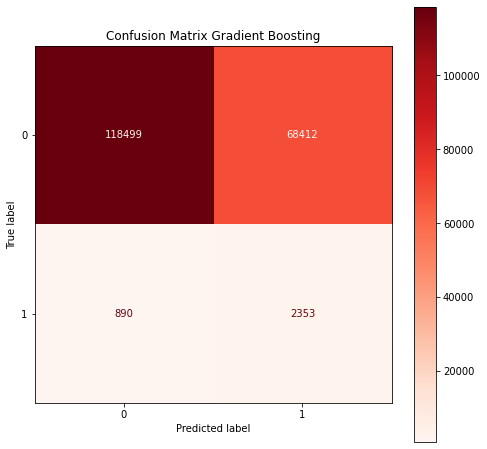

In [71]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Confusion Matrix Gradient Boosting')
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Reds, ax=ax);

In [72]:
accuracy= []
recall =[]
auc= []
precision = []

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

y_pred_prob = gb.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
auc.append(round(roc_auc_score(y_test,y_pred_prob),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Gradient Boosting']
result_df3 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'AUC':auc, 'Precision':precision}, index=model_names)
result_df3

,Accuracy,Recall,AUC,Precision
Gradient Boosting,0.6649,0.728,0.7618,0.0362


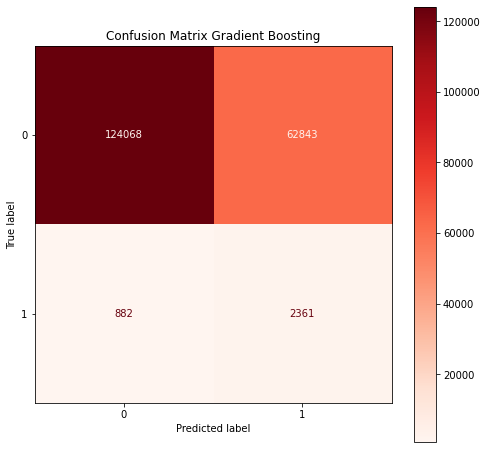

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Confusion Matrix Gradient Boosting')
plot_confusion_matrix(gb, X_test, y_test, cmap=plt.cm.Reds, ax=ax);

In [74]:
accuracy= []
recall =[]
auc= []
precision = []

xgbc_base = XGBClassifier(random_state=0)
xgbc_base.fit(X_train, y_train)
y_pred = xgbc_base.predict(X_test)

y_pred_prob = gb.predict_proba(X_test)[::,1]

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
auc.append(round(roc_auc_score(y_test,y_pred_prob),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost Classifier']
result_df4 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'AUC':auc, 'Precision':precision}, index=model_names)
result_df4

,Accuracy,Recall,AUC,Precision
XGBoost Classifier,0.6613,0.7249,0.7618,0.0357


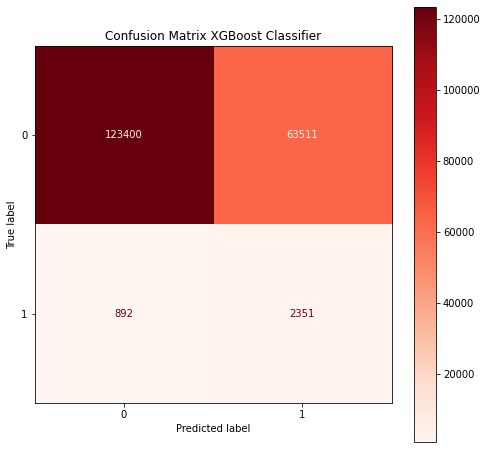

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Confusion Matrix XGBoost Classifier')
plot_confusion_matrix(xgbc_base, X_test,y_test, cmap=plt.cm.Reds, ax=ax);

In [78]:
accuracy= []
recall =[]
auc= []
precision = []


rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
threshold = 0.5

y_pred_prob = rf.predict_proba(X_test)[::,1]


accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
auc.append(round(roc_auc_score(y_test,y_pred_prob),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Random Forest']
result_df5 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall,'AUC':auc, 'Precision':precision}, index=model_names)
result_df5

,Accuracy,Recall,AUC,Precision
Random Forest,0.6697,0.7308,0.7654,0.0369


In [79]:
from matplotlib import pyplot

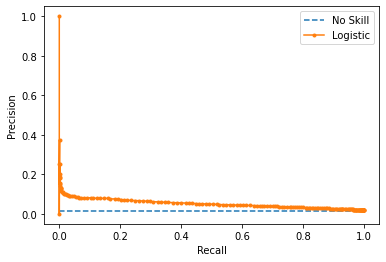

In [81]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
# lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80    186911
           1       0.04      0.73      0.07      3243

    accuracy                           0.67    190154
   macro avg       0.51      0.70      0.43    190154
weighted avg       0.98      0.67      0.79    190154



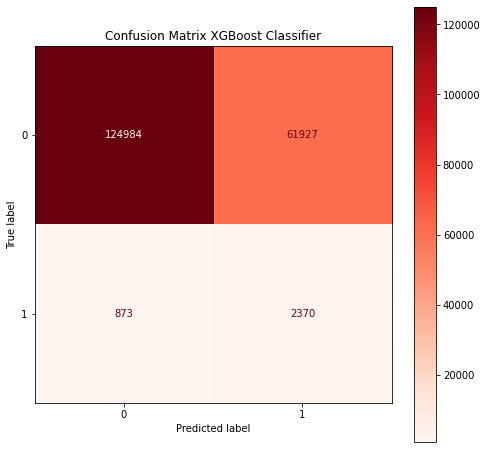

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Confusion Matrix XGBoost Classifier')
plot_confusion_matrix(rf, X_test,y_test, cmap=plt.cm.Reds, ax=ax);

In [84]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
[print('{:20}    Importance: {}'.format(*pair)) for pair in feature_importances];

transactionAmount       Importance: 0.17
availableMoney          Importance: 0.09
cardLast4Digits         Importance: 0.09
currentBalance          Importance: 0.09
transaction_minute      Importance: 0.08
transaction_day         Importance: 0.07
transaction_hour        Importance: 0.07
transaction_month       Importance: 0.06
transaction_week        Importance: 0.05
creditLimit             Importance: 0.04
5.0                     Importance: 0.04
9.0                     Importance: 0.02
cardPresent             Importance: 0.01
8.0                     Importance: 0.01
entertainment           Importance: 0.01
fastfood                Importance: 0.01
food                    Importance: 0.01
fuel                    Importance: 0.01
hotels                  Importance: 0.01
mobileapps              Importance: 0.01
online_gifts            Importance: 0.01
online_retail           Importance: 0.01
rideshare               Importance: 0.01
expirationDateKeyInMatch    Importance: 0.0
matchedCVV   